# Multiple Linear Regression
## Shared Bikes Demand Prediction - Assignment Solution

#### Problem Statement:

A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, we have to find:


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands

The code is divided into the following sections:
- Data understanding and exploration
- Data Visualisation
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Reading the dataset
BS_day = pd.read_csv("day.csv")

In [34]:
# Let's take a look at the first few rows
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [35]:
# Let's look at the number of rows and columns in the dataset
BS_day.shape

(730, 16)

In [36]:
# Understanding the feature names in the dataset
BS_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [37]:
# Getting insights of the features
BS_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [38]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(BS_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


#### Understanding the Data Dictionary and parts of Data Preparation



In [39]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
BS_day.loc[(BS_day['season'] == 1) , 'season'] = 'spring'

# 2=summer
BS_day.loc[(BS_day['season'] == 2) , 'season'] = 'summer'

# 3=fall
BS_day.loc[(BS_day['season'] == 3) , 'season'] = 'fall'

# 4=winter
BS_day.loc[(BS_day['season'] == 4) , 'season'] = 'winter'

In [40]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
BS_day['season'].astype('category').value_counts()

,count
season,
fall,188
summer,184
spring,180
winter,178


In [41]:
# year (0: 2018, 1:2019)
BS_day['yr'].astype('category').value_counts()

,count
yr,
0,365
1,365


In [42]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
BS_day[['mnth']] = BS_day[['mnth']].apply(object_map)

In [43]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
BS_day['mnth'].astype('category').value_counts()

,count
mnth,
Aug,62
Dec,62
Jul,62
Jan,62
Oct,62
May,62
Mar,62
Apr,60
Nov,60


In [44]:
# whether day is a holiday or not (0: No, 1: Yes)
BS_day['holiday'].astype('category').value_counts()

,count
holiday,
0,709
1,21


In [45]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
BS_day[['weekday']] = BS_day[['weekday']].apply(str_map)

In [46]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
BS_day['weekday'].astype('category').value_counts()

,count
weekday,
Mon,105
Tues,105
Wed,105
Thurs,104
Sat,104
Sun,104
Fri,103


In [47]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
BS_day['workingday'].astype('category').value_counts()

,count
workingday,
1,499
0,231


In [48]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
BS_day.loc[(BS_day['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
BS_day.loc[(BS_day['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
BS_day.loc[(BS_day['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
BS_day.loc[(BS_day['weathersit'] == 4) , 'weathersit'] = 'D'

In [49]:
# Extracting the type of weather situations present in the data
BS_day['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [50]:
# Taking count based on weather situations
BS_day['weathersit'].astype('category').value_counts()

,count
weathersit,
A,463
B,246
C,21


### 2. Data Visualisation

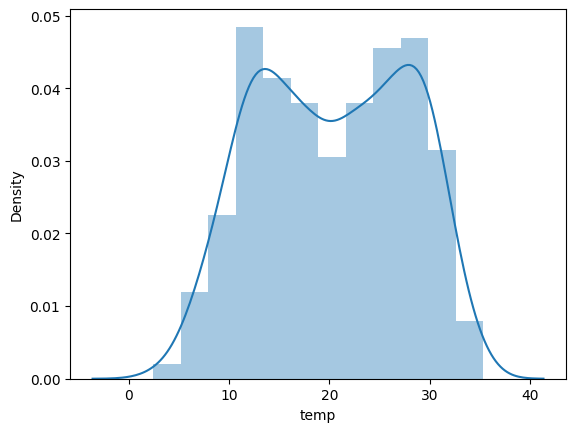

In [51]:
# temperature
sns.distplot(BS_day['temp'])
plt.show()

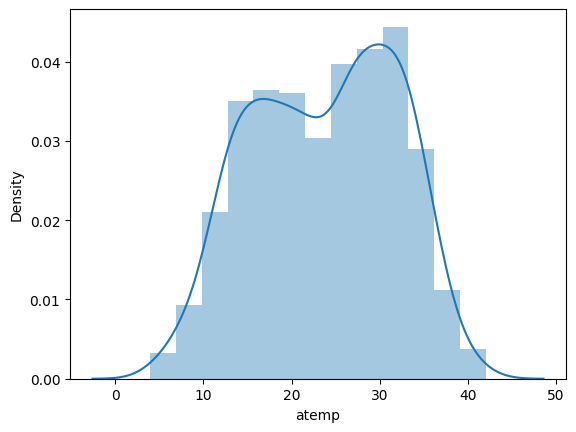

In [52]:
# feeling temperature
sns.distplot(BS_day['atemp'])
plt.show()

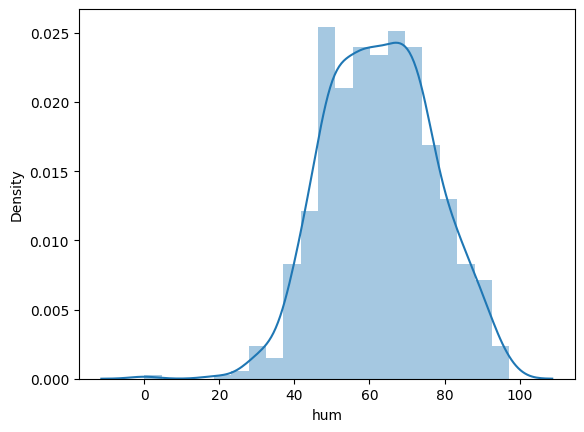

In [53]:
# humidity
sns.distplot(BS_day['hum'])
plt.show()

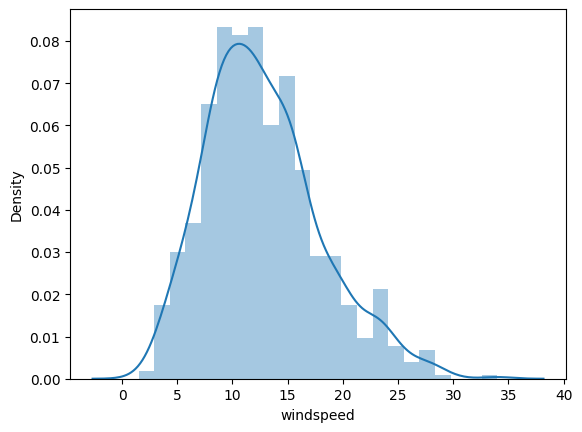

In [54]:
# wind speed
sns.distplot(BS_day['windspeed'])
plt.show()

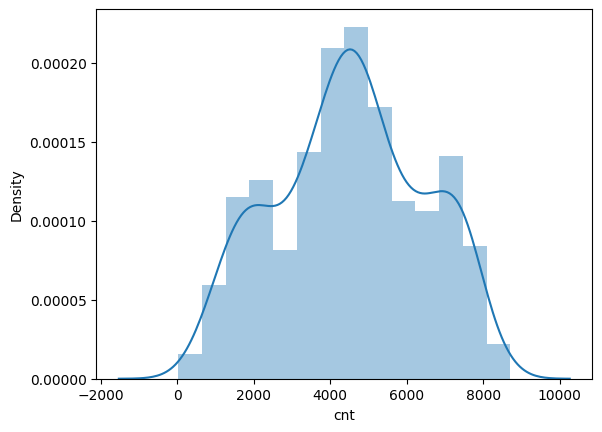

In [55]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(BS_day['cnt'])
plt.show()

In [56]:
# Converting date to datetime format
BS_day['dteday']=BS_day['dteday'].astype('datetime64[ns]')

In [57]:
# All categorical variables in the dataset
BS_day_categorical=BS_day.select_dtypes(exclude=['float64','datetime64','int64'])
print(BS_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [58]:
BS_day_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,Sun,B
727,spring,Dec,Mon,B
728,spring,Dec,Tues,A


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

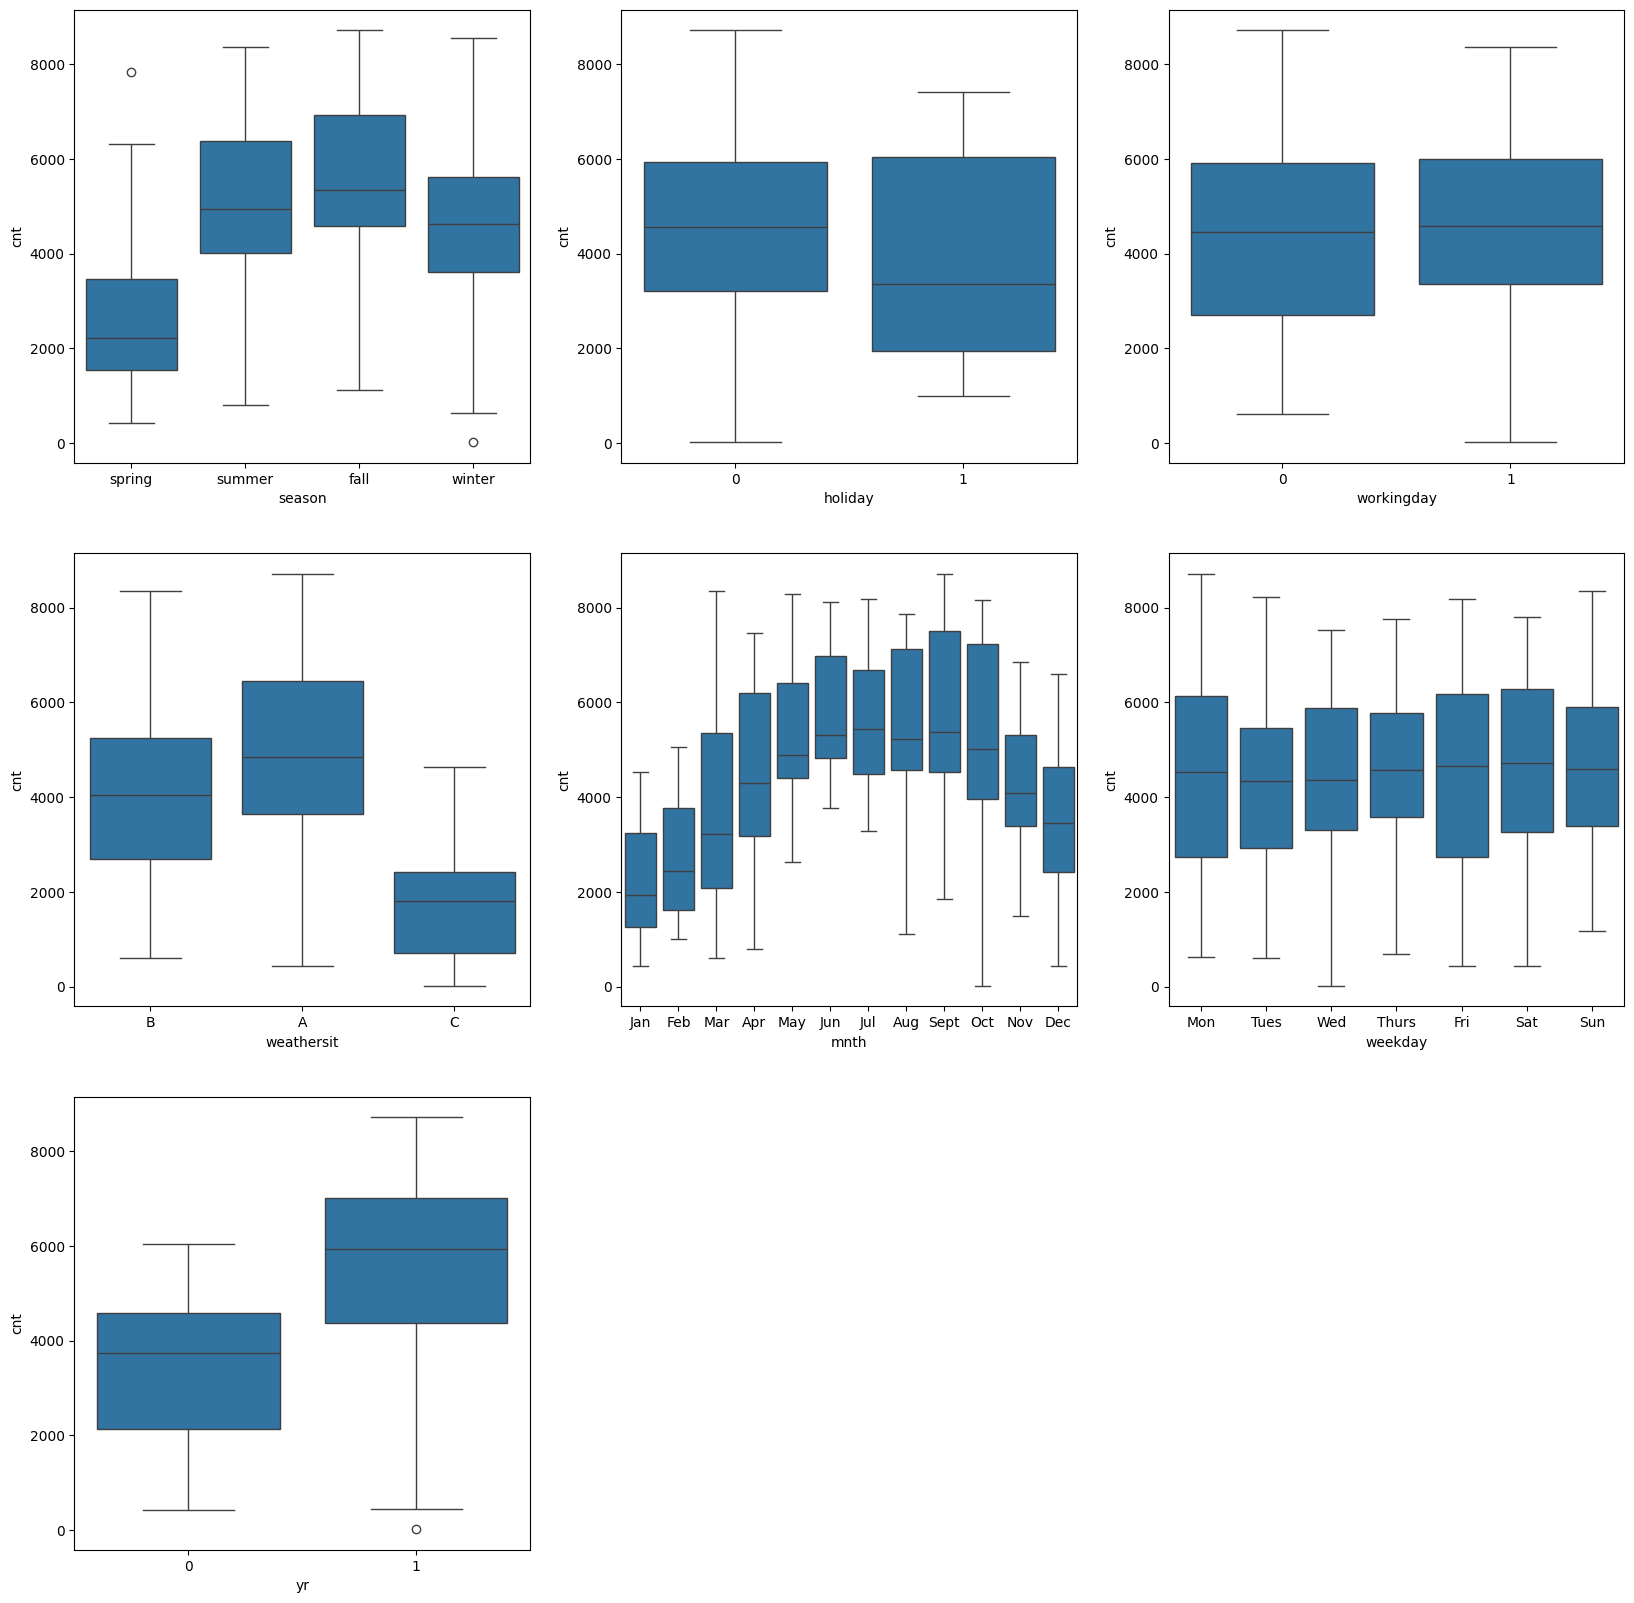

In [59]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BS_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = BS_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = BS_day)
plt.show()
#plt.subplot(3,3,8)
#sns.boxplot(x = 'date', y = 'cnt', data = BS_day)


#### Visualising Numeric Variables


In [60]:
# Converting "casual","registered" and "cnt" numeric variables to float.
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    BS_day[var] = BS_day[var].astype("float")
#BS_day['casual']= BS_day['casual'].astype('float')
#BS_day['registered']=BS_day['registered'].astype('float')
#BS_day['cnt']=BS_day['cnt'].astype('float')
#BS_day.head()

In [61]:
# All numeric variables in the dataset
BS_day_numeric = BS_day.select_dtypes(include=['float64'])
BS_day_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


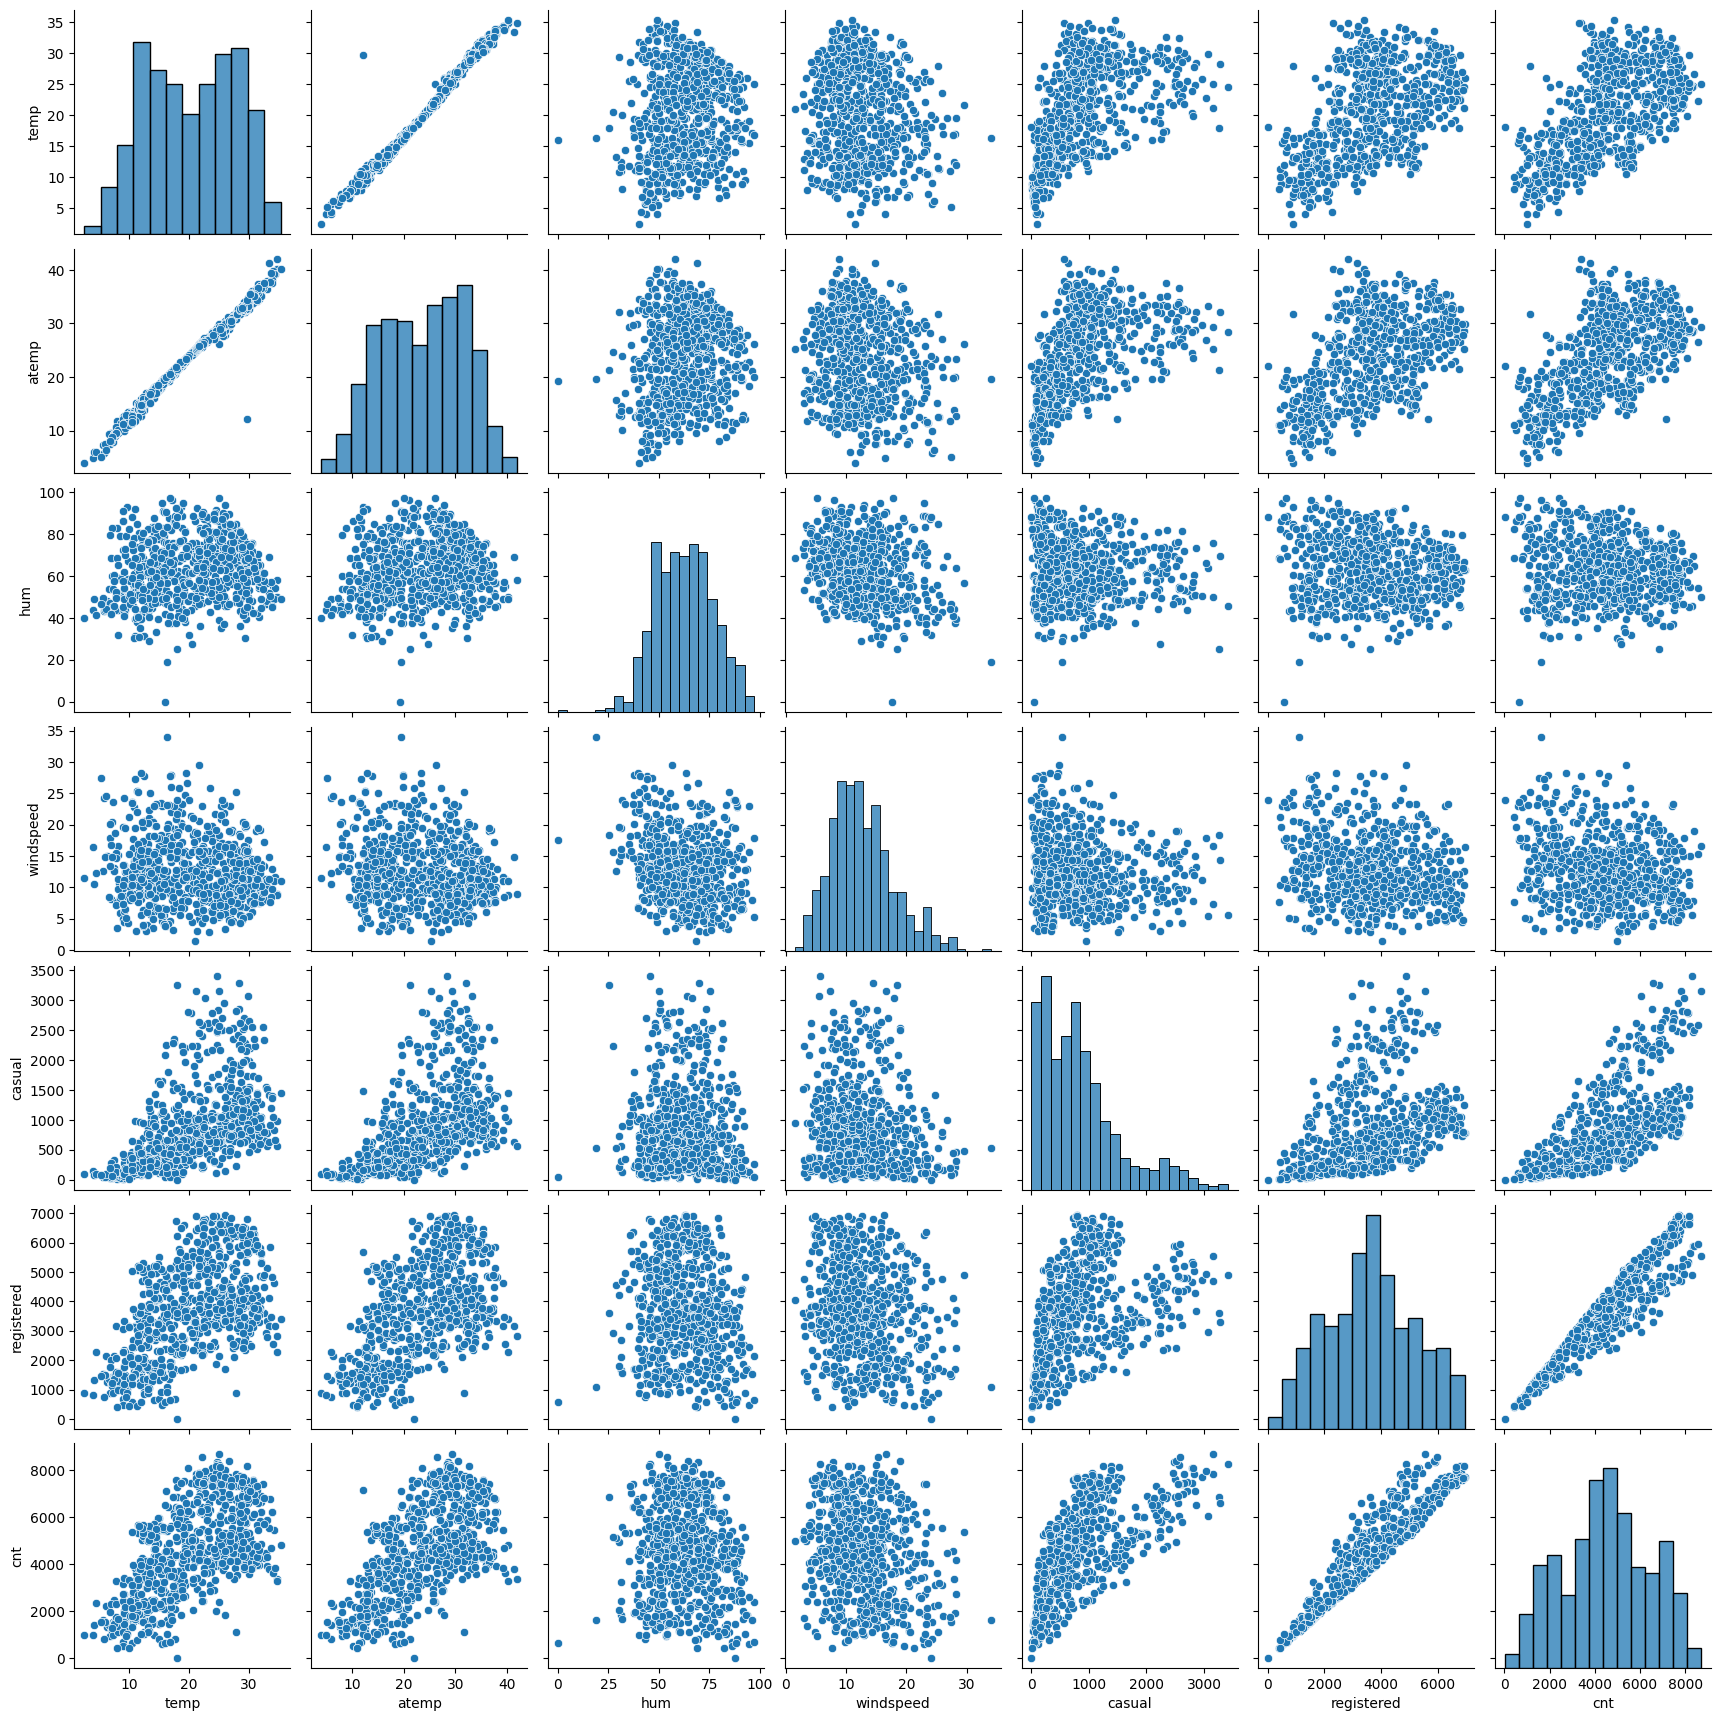

In [62]:
# Pairwise scatter plot
sns.pairplot(BS_day_numeric)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [63]:
# Correlation matrix
cor = BS_day_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


Let's plot the correlations on a heatmap for better visualisation

<Axes: >

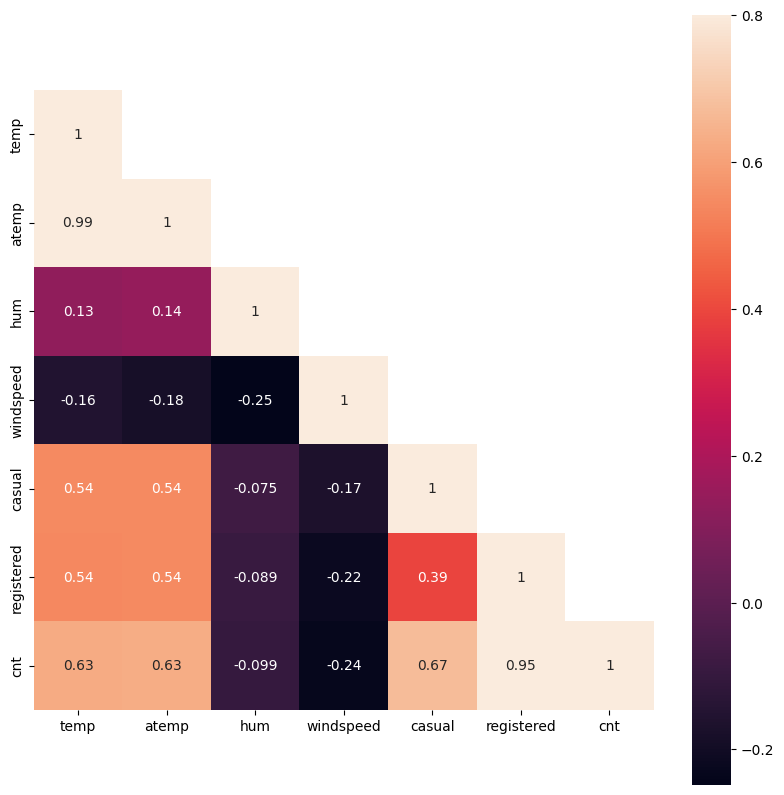

In [64]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [65]:
#removing atemp as it is highly correlated with temp
BS_day.drop('atemp',axis=1,inplace=True)

## 3. Data Preparation


#### Data Preparation


In [66]:
# Subset all categorical variables
BS_day_categorical=BS_day.select_dtypes(include=['object'])

#### Dummy Variables


In [67]:
# Convert into dummies
BS_day_dummies = pd.get_dummies(BS_day_categorical, drop_first=True)
BS_day_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
# Drop categorical variable columns
BS_day = BS_day.drop(list(BS_day_categorical.columns), axis=1)

In [69]:
# Concatenate dummy variables with the original dataframe
BS_day = pd.concat([BS_day, BS_day_dummies], axis=1)

In [70]:
# Let's check the first few rows
BS_day.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,False,False,True,False,False,False,False,False,True,False
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,False,False,False,False,False,False,True,False,True,False
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,False,False,False,False,False,False,False,True,False,False
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,False,False,False,False,False,True,False,False,False,False
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,False,False,False,False,False,False,False,False,False,False


In [71]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
BS_day=BS_day.drop(['instant','dteday'], axis = 1, inplace = False)
BS_day.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,True,...,False,False,True,False,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,True,...,False,False,False,False,False,False,True,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,True,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,True,...,False,False,False,False,False,True,False,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,True,...,False,False,False,False,False,False,False,False,False,False


## 4. Model Building and Evaluation


In [72]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(BS_day, train_size=0.7, test_size=0.3, random_state=100)

In [73]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,False,...,True,False,False,False,False,True,False,False,False,False
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,False,...,False,False,False,False,False,True,False,False,False,False
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,True,...,False,False,True,False,False,False,False,False,True,False
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,True,...,False,False,False,False,False,False,True,False,False,False
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,False,...,False,False,False,False,False,False,False,True,True,False
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,False,...,False,False,False,True,False,False,False,False,False,False
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,True,...,False,False,False,False,False,False,False,False,False,False
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,False,...,False,False,True,False,False,False,False,False,True,False


### Scaling


In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()

In [76]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [77]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,False,...,True,False,False,False,False,True,False,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,False,...,False,False,False,False,False,True,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,True,...,False,False,True,False,False,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,True,...,False,False,False,False,False,False,True,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,False,...,False,False,False,False,False,False,False,True,True,False
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,False,...,False,False,False,True,False,False,False,False,False,False
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,True,...,False,False,False,False,False,False,False,False,False,False
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,False,...,False,False,True,False,False,False,False,False,True,False


As expected, the variables have been appropriately scaled.

In [78]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


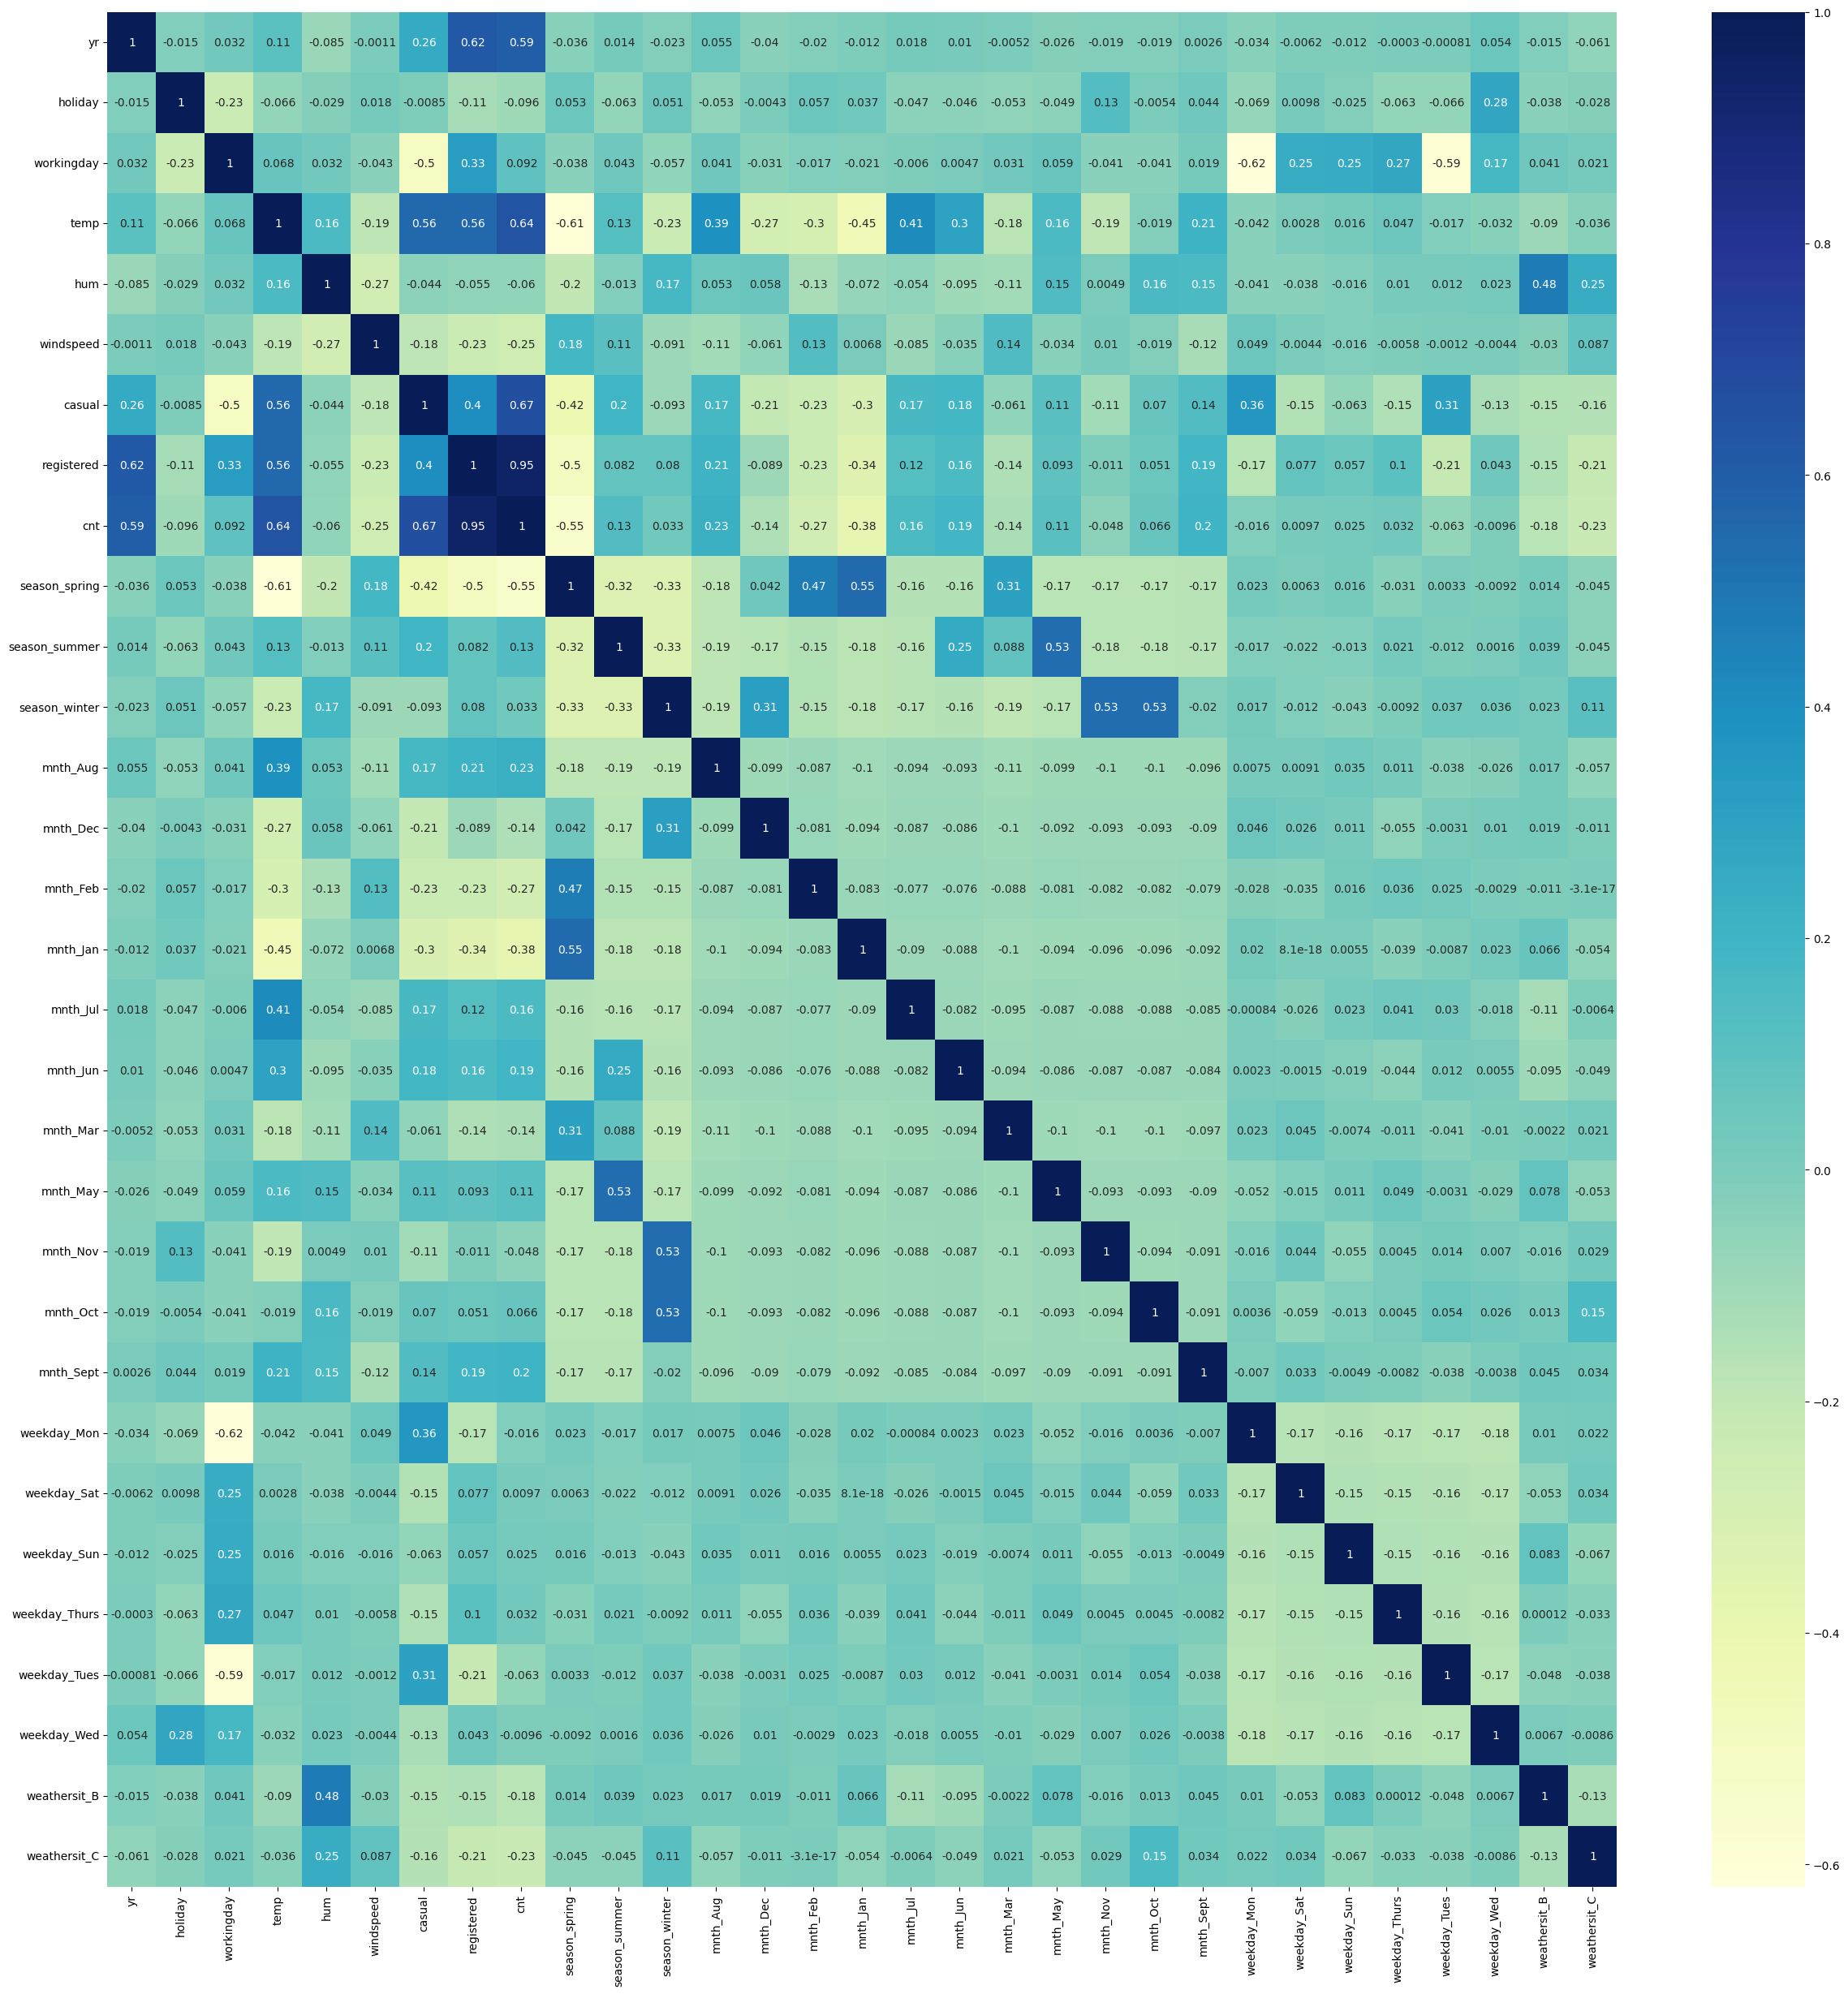

In [79]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most, after 'casual' and 'registered'. Let's see a pairplot for `temp` vs `cnt`.

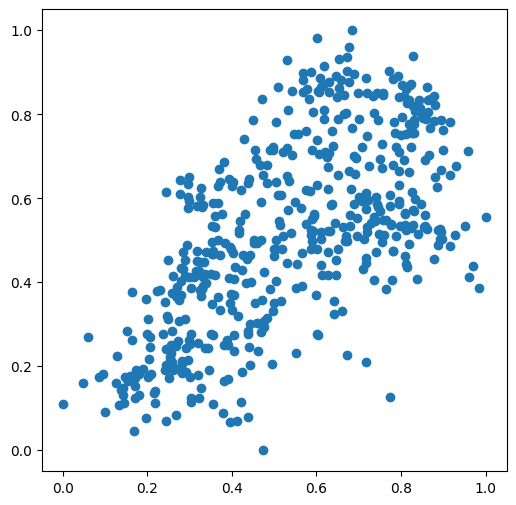

In [80]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [81]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1)

In [82]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [83]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1, 0, 1, ..., False, False, False],
       [1, 0, 1, ..., False, False, False],
       [1, 0, 0, ..., False, True, False],
       ...,
       [0, 0, 1, ..., False, False, False],
       [0, 0, 0, ..., False, True, False],
       [0, 0, 1, ..., True, True, False]], dtype=object)

In [84]:
X_train.shape

(510, 28)

### Building the first model with all the features

Let's now build our first model with all the features.

In [86]:
print(X_train.dtypes)
print(y_train.dtypes)

yr                 int64
holiday            int64
workingday         int64
temp             float64
hum              float64
windspeed        float64
season_spring       bool
season_summer       bool
season_winter       bool
mnth_Aug            bool
mnth_Dec            bool
mnth_Feb            bool
mnth_Jan            bool
mnth_Jul            bool
mnth_Jun            bool
mnth_Mar            bool
mnth_May            bool
mnth_Nov            bool
mnth_Oct            bool
mnth_Sept           bool
weekday_Mon         bool
weekday_Sat         bool
weekday_Sun         bool
weekday_Thurs       bool
weekday_Tues        bool
weekday_Wed         bool
weathersit_B        bool
weathersit_C        bool
dtype: object
float64


In [87]:
X_train = X_train.astype(int)

In [88]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

,0
const,3.308492e-01
yr,2.460707e-01
holiday,4.560561e-02
workingday,1.158094e-01
temp,1.383441e-17
hum,-1.159207e-17
windspeed,-4.132211e-02
season_spring,-1.002840e-01
season_summer,-9.383530e-03
season_winter,8.849167e-02


In [89]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [90]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.46070712e-01 -3.71066898e-02  3.30970531e-02 -1.11022302e-16
 -1.11022302e-16 -4.13221137e-02 -1.00284036e-01 -9.38352982e-03
  8.84916680e-02  1.21134460e-01 -1.24037776e-01 -1.15936092e-01
 -1.70046059e-01  9.56028042e-02  1.22687933e-01 -2.79740662e-02
  9.98542170e-02 -1.09565644e-01 -2.64953356e-03  1.41052783e-01
  2.95536891e-02 -2.99842655e-03  3.51753137e-03 -1.43766308e-02
 -2.55440524e-02 -2.36499775e-02 -8.72720491e-02 -3.20333903e-01]
0.4135614934445473


In [91]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     82.39
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          9.14e-157
Time:                        20:04:02   Log-Likelihood:                 461.64
No. Observations:                 510   AIC:                            -871.3
Df Residuals:                     484   BIC:                            -761.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3308      0.028     11.711      0.000       0.275       0.386
yr                0.2461      0.009     27.365      0.000       0.228       0.264
holiday           0.0456      0.026      1.746      0.081      -0.006       0.097
workingday        0.1158      0.012      9.848      0.000       0.093       0.139
temp           1.383e-17    9.1e-17      0.152      0.879   -1.65e-16    1.93e-16
hum           -1.159e-17   7.09e-17     -0.164      0.870   -1.51e-16    1.28e-16
windspeed        -0.0413      0.103     -0.402      0.688      -0.243       0.161
season_spring    -0.1003      0.034     -2.976      0.003      -0.166      -0.034
season_summer    -0.0094      0.029     -0.320      0.749      -0.067       0.048
season_winter     0.0885      0.032      2.804      0.005       0.026       0.151
mnth_Aug          0.1211      0.036      3.330      0.001       0.050       0.193
mnth_Dec         -0.1240      0.036     -3.410      0.001      -0.196      -0.053
mnth_Feb         -0.1159      0.036     -3.246      0.001      -0.186      -0.046
mnth_Jan         -0.1700      0.035     -4.914      0.000      -0.238      -0.102
mnth_Jul          0.0956      0.037      2.581      0.010       0.023       0.168
mnth_Jun          0.1227      0.025      4.852      0.000       0.073       0.172
mnth_Mar         -0.0280      0.027     -1.020      0.308      -0.082       0.026
mnth_May          0.0999      0.022      4.499      0.000       0.056       0.143
mnth_Nov         -0.1096      0.040     -2.709      0.007      -0.189      -0.030
mnth_Oct         -0.0026      0.040     -0.066      0.948      -0.082       0.077
mnth_Sept         0.1411      0.035      3.978      0.000       0.071       0.211
weekday_Mon       0.1123      0.014      8.017      0.000       0.085       0.140
weekday_Sat      -0.0030      0.017     -0.180      0.857      -0.036       0.030
weekday_Sun       0.0035      0.017      0.208      0.835      -0.030       0.037
weekday_Thurs    -0.0144      0.017     -0.860      0.390      -0.047       0.018
weekday_Tues      0.0572      0.014      4.111      0.000       0.030       0.084
weekday_Wed      -0.0236      0.017     -1.429      0.154      -0.056       0.009
weathersit_B     -0.0873      0.010     -8.988      0.000      -0.106      -0.068
weathersit_C     -0.3203      0.027    -11.720      0.000      -0.374      -0.267
==============================================================================
Omnibus:                       90.897   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.276
Skew:                          -0.711   Prob(JB):                     2.69e-88
Kurtosis:                       7.118   Cond. No.                     1.38e+16
================================================================

This model has an Adjusted R-squared value of **84.5%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.

#### Model Building Using RFE


In [95]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)
print(rfe1.ranking_)

[ True False False False False False  True False  True  True  True  True
  True  True  True False  True  True False  True  True False False False
 False False  True  True]
[ 1  4  2 14 13  3  1  9  1  1  1  1  1  1  1  5  1  1 12  1  1 11 10  8
  6  7  1  1]


#### Model Building and Evaluation

In [96]:
# Import statsmodels
import statsmodels.api as sm

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,season_spring,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_May,mnth_Nov,mnth_Sept,weekday_Mon,weathersit_B,weathersit_C
653,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
576,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1.0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [97]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     131.3
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          2.02e-161
Time:                        20:06:14   Log-Likelihood:                 448.31
No. Observations:                 510   AIC:                            -864.6
Df Residuals:                     494   BIC:                            -796.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4104      0.014     28.521

Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from **84.5%** to **84.4%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [99]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
a=X_train_rfe1.drop('const',axis=1)

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,season_spring,3.44
2,season_winter,2.58
6,mnth_Jan,2.15
5,mnth_Feb,1.86
0,yr,1.79
10,mnth_Nov,1.76
4,mnth_Dec,1.54
13,weathersit_B,1.50
3,mnth_Aug,1.18
12,weekday_Mon,1.17


In [103]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=7)

# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)
print(rfe2.ranking_)

[ True False False False False False  True False False  True False False
  True False  True False False False False  True False False False False
 False False False  True]
[ 1 12 10 22 21 11  1 17  7  1  5  4  1  2  1 13  3  6 20  1  9 19 18 16
 14 15  8  1]


In [104]:
# Import statsmodels
import statsmodels.api as sm

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,season_spring,mnth_Aug,mnth_Jan,mnth_Jun,mnth_Sept,weathersit_C
653,1.0,1,0,0,0,0,0,0
576,1.0,1,0,0,0,0,0,0
426,1.0,1,1,0,0,0,0,0
728,1.0,1,1,0,0,0,0,0
482,1.0,1,0,0,0,0,0,0


In [105]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     188.4
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          4.97e-136
Time:                        20:07:07   Log-Likelihood:                 367.04
No. Observations:                 510   AIC:                            -718.1
Df Residuals:                     502   BIC:                            -684.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4287      0.009     46.345

Now let's check the VIF for these selected features and decide further.

In [106]:
b=X_train_rfe2.drop('const',axis=1)

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,season_spring,1.71
3,mnth_Jan,1.57
0,yr,1.35
2,mnth_Aug,1.09
5,mnth_Sept,1.06
4,mnth_Jun,1.05
6,weathersit_C,1.01


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [109]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum", axis=1, inplace=True, errors='ignore')
X_train_rfe2

,const,yr,season_spring,mnth_Aug,mnth_Jan,mnth_Jun,mnth_Sept,weathersit_C
653,1.0,1,0,0,0,0,0,0
576,1.0,1,0,0,0,0,0,0
426,1.0,1,1,0,0,0,0,0
728,1.0,1,1,0,0,0,0,0
482,1.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0,0,1,0,0
578,1.0,1,0,1,0,0,0,0
53,1.0,0,1,0,0,0,0,0
350,1.0,0,0,0,0,0,0,0


In [111]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     188.4
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          4.97e-136
Time:                        20:08:09   Log-Likelihood:                 367.04
No. Observations:                 510   AIC:                            -718.1
Df Residuals:                     502   BIC:                            -684.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4287      0.009     46.345

The model seems to be doing a good job. Let's also quickly take a look at the VIF values.

In [112]:
c=X_train_rfe2.drop('const',axis=1)

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,season_spring,1.71
3,mnth_Jan,1.57
0,yr,1.35
2,mnth_Aug,1.09
5,mnth_Sept,1.06
4,mnth_Jun,1.05
6,weathersit_C,1.01


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `84.5%` with **28 variables** to just `79.1%` using **6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [114]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

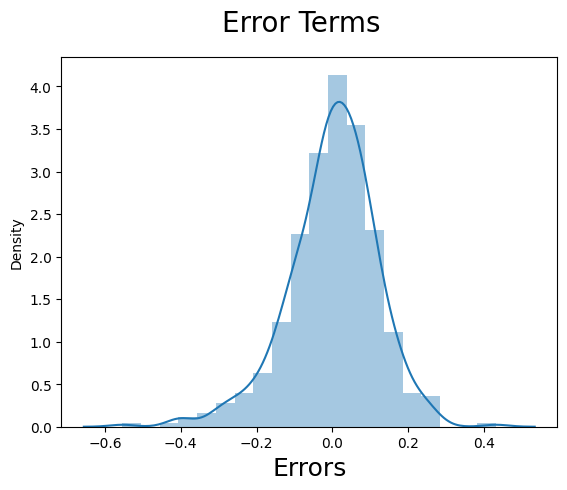

In [115]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)
# Give the X-label
plt.xlabel('Errors', fontsize = 18)

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [116]:
X_train_rfe2

,const,yr,season_spring,mnth_Aug,mnth_Jan,mnth_Jun,mnth_Sept,weathersit_C
653,1.0,1,0,0,0,0,0,0
576,1.0,1,0,0,0,0,0,0
426,1.0,1,1,0,0,0,0,0
728,1.0,1,1,0,0,0,0,0
482,1.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0,0,1,0,0
578,1.0,1,0,1,0,0,0,0
53,1.0,0,1,0,0,0,0,0
350,1.0,0,0,0,0,0,0,0


In [117]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [118]:
df_test[var] = scaler.transform(df_test[var])

In [119]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [120]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
535,1,0,1,0.901354,0.610133,0.153728,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
299,0,0,1,0.511964,0.837699,0.334206,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
221,0,0,1,0.881625,0.437098,0.339570,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
152,0,0,1,0.817246,0.314298,0.537414,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [121]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=c.columns
col2

Index(['yr', 'season_spring', 'mnth_Aug', 'mnth_Jan', 'mnth_Jun', 'mnth_Sept',
       'weathersit_C'],
      dtype='object')

In [122]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [123]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   season_spring  219 non-null    bool   
 3   mnth_Aug       219 non-null    bool   
 4   mnth_Jan       219 non-null    bool   
 5   mnth_Jun       219 non-null    bool   
 6   mnth_Sept      219 non-null    bool   
 7   weathersit_C   219 non-null    bool   
dtypes: bool(6), float64(1), int64(1)
memory usage: 6.4 KB


In [124]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

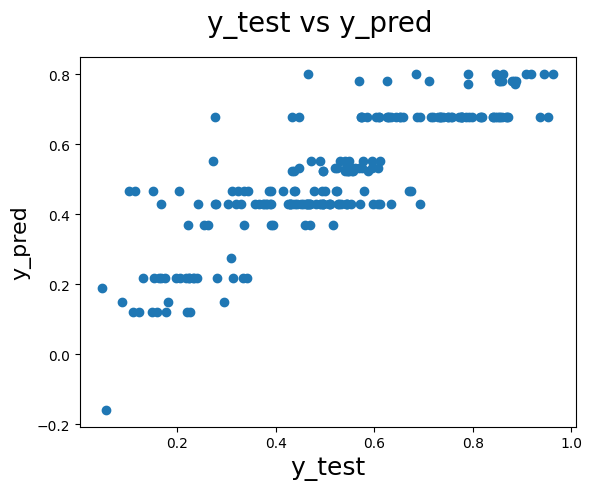

In [125]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [126]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7167059823830226

Thus, for the model with 6 variables, the r-squared on training and test data is about 79.3% and 78.02% respectively. The adjusted r-squared on the train set is about is about 79.1%.

#### Checking the correlations between the final predictor variables

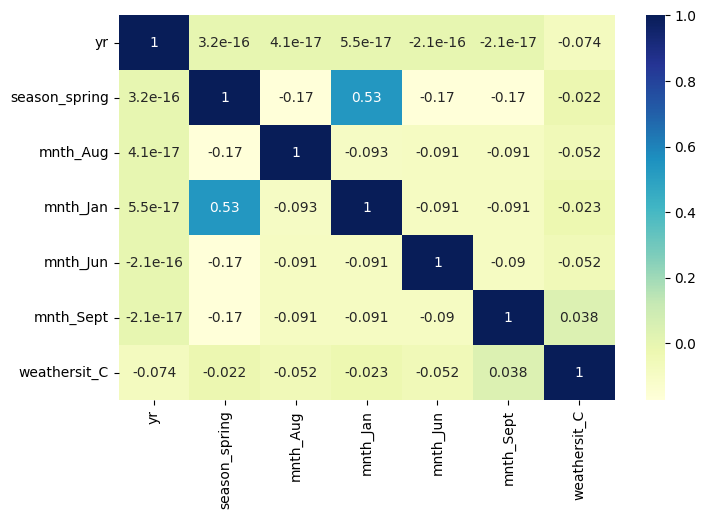

In [127]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(BS_day[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations.

Thus, the final model consists of the 6 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.

